In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pickle

In [2]:
WORKING_DIR = os.getcwd()
BASE_DIR = os.path.dirname(WORKING_DIR)
DATA_DIR = os.path.join(BASE_DIR, 'data')
CACHE = os.path.join(DATA_DIR, 'cache')

In [3]:
positions_df = pd.read_csv(f'{CACHE}/positions.csv')

In [4]:
positions_df.columns

Index(['vehicle_0_pos', 'vehicle_1_pos', 'vehicle_10_pos', 'vehicle_11_pos',
       'vehicle_12_pos', 'vehicle_13_pos', 'vehicle_14_pos', 'vehicle_15_pos',
       'vehicle_16_pos', 'vehicle_17_pos', 'vehicle_19_pos', 'vehicle_2_pos',
       'vehicle_4_pos', 'vehicle_5_pos', 'vehicle_6_pos', 'vehicle_7_pos',
       'vehicle_8_pos'],
      dtype='object')

In [5]:
cols = [f'veh_{num+1}_pos' for num in range(17)]

In [6]:
positions_df.columns = cols

In [7]:
positions_df.head(n=5)

veh_1_pos  veh_2_pos  veh_3_pos  veh_4_pos  veh_5_pos  veh_6_pos  \
0     643.23     362.75     476.04     551.59     441.71     113.18   
1     655.90     370.55     486.83     564.90     452.88     116.03   
2     668.23     378.11     497.09     578.71     464.19     119.14   
3     679.96     385.32     507.35     591.86     475.16     122.11   
4     692.82     393.16     517.24     604.84     486.88     124.68   

   veh_7_pos  veh_8_pos  veh_9_pos  veh_10_pos  veh_11_pos  veh_12_pos  \
0     383.10     167.00     203.39      104.06      200.55      186.78   
1     395.42     171.63     211.02      108.27      211.44      199.25   
2     406.73     177.03     218.35      111.52      222.21      211.16   
3     419.15     181.79     225.11      115.34      232.95      223.58   
4     431.39     186.27     231.74      118.68      243.81      235.65   

   veh_13_pos  veh_14_pos  veh_15_pos  veh_16_pos  veh_17_pos  
0       99.19       55.45       30.70       18.04        5.10  
1      103.51       61.61       36.01       24.82        6.55  
2      107.05       67.78       40.62       32.47        9.50  
3      110.50       75.01       45.28       39.39       15.02  
4      113.74       81.46       49.98       46.90       22.57

In [8]:
speeds_df = pd.read_csv(f'{CACHE}/speeds.csv')

In [9]:
cols = [f'veh_{num+1}_speed' for num in range(17)]

In [10]:
speeds_df.columns = cols

In [11]:
speeds_df.head(n=2)

veh_1_speed  veh_2_speed  veh_3_speed  veh_4_speed  veh_5_speed  \
0        12.13         6.92         9.78        13.06        11.07   
1        12.66         7.80        10.79        13.31        11.16   

   veh_6_speed  veh_7_speed  veh_8_speed  veh_9_speed  veh_10_speed  \
0         3.06        12.14         4.94         6.72          3.66   
1         2.85        12.32         4.62         7.63          4.21   

   veh_11_speed  veh_12_speed  veh_13_speed  veh_14_speed  veh_15_speed  \
0         10.55         11.54          6.16          6.93          4.33   
1         10.88         12.47          4.32          6.16          5.32   

   veh_16_speed  veh_17_speed  
0          5.77          0.00  
1          6.78          1.45

In [12]:
positions_df.describe().T

count          mean          std     min       25%       50%  \
veh_1_pos   1471.0   9734.277954  5256.679260  643.23  5188.385   9735.28   
veh_2_pos   1471.0   5687.040945  3078.252727  362.75  3028.210   5681.29   
veh_3_pos   1471.0   8037.725221  4373.437348  476.04  4258.225   8035.68   
veh_4_pos   1471.0  10347.356669  5661.316425  551.59  5446.580  10349.35   
veh_5_pos   1471.0   8607.660897  4722.589883  441.71  4517.650   8605.82   
veh_6_pos   1471.0   2145.438973  1172.978019  113.18  1132.315   2146.09   
veh_7_pos   1471.0   9026.047573  5001.275834  383.10  4697.655   9025.00   
veh_8_pos   1471.0   3888.386451  2148.149805  167.00  2031.300   3896.30   
veh_9_pos   1471.0   5520.753861  3073.598447  203.39  2861.155   5519.55   
veh_10_pos  1471.0   2939.884405  1636.909954  104.06  1528.430   2935.61   
veh_11_pos  1471.0   8250.095037  4651.406503  200.55  4229.805   8247.96   
veh_12_pos  1471.0   8886.484432  5022.238924  186.78  4544.200   8891.78   
veh_13_pos  1471.0   6959.828674  4022.732047   99.19  3480.800   6954.77   
veh_14_pos  1471.0   5011.999538  2873.898429   55.45  2524.810   5006.44   
veh_15_pos  1471.0   3506.565425  2014.247857   30.70  1762.970   3507.02   
veh_16_pos  1471.0   5443.410000  3135.889069   18.04  2734.670   5441.30   
veh_17_pos  1471.0   5255.171319  3045.495499    5.10  2618.240   5253.19   

                  75%       max  
veh_1_pos   14280.150  18834.73  
veh_2_pos    8351.420  11015.41  
veh_3_pos   11821.135  15600.91  
veh_4_pos   15242.630  20134.59  
veh_5_pos   12691.955  16781.60  
veh_6_pos    3163.605   4172.85  
veh_7_pos   13352.910  17682.90  
veh_8_pos    5745.280   7599.82  
veh_9_pos    8177.865  10846.83  
veh_10_pos   4360.665   5771.03  
veh_11_pos  12270.120  16302.91  
veh_12_pos  13232.105  17577.55  
veh_13_pos  10442.935  13923.00  
veh_14_pos   7500.500   9985.92  
veh_15_pos   5252.265   6995.62  
veh_16_pos   8152.670  10877.35  
veh_17_pos   7893.910  10522.87

In [13]:
speeds_df.describe().T

count       mean       std    min     25%    50%     75%    max
veh_1_speed   1471.0  12.374956  0.384279  11.64  12.030  12.38  12.715  13.02
veh_2_speed   1471.0   7.246553  0.370072   6.61   6.930   7.25   7.560   7.91
veh_3_speed   1471.0  10.288654  0.373903   9.47   9.960  10.29  10.620  10.94
veh_4_speed   1471.0  13.321550  0.381581  11.38  13.010  13.34  13.630  13.97
veh_5_speed   1471.0  11.115581  0.374785   9.62  10.805  11.11  11.430  11.77
veh_6_speed   1471.0   2.761788  0.371155   2.11   2.440   2.76   3.080   3.40
veh_7_speed   1471.0  11.768749  0.394379   9.63  11.450  11.77  12.110  12.42
veh_8_speed   1471.0   5.056200  0.371395   4.18   4.740   5.06   5.370   5.71
veh_9_speed   1471.0   7.240054  0.383736   6.59   6.900   7.24   7.580   7.89
veh_10_speed  1471.0   3.855003  0.374395   3.19   3.530   3.87   4.180   4.49
veh_11_speed  1471.0  10.953759  0.378313   9.75  10.620  10.96  11.280  11.60
veh_12_speed  1471.0  11.830252  0.372876  10.56  11.520  11.82  12.160  12.48
veh_13_speed  1471.0   9.401815  0.761194   1.89   9.130   9.47   9.800  10.13
veh_14_speed  1471.0   6.755588  0.396062   4.52   6.430   6.76   7.090   7.43
veh_15_speed  1471.0   4.737838  0.378423   2.61   4.425   4.71   5.070   5.39
veh_16_speed  1471.0   7.386186  0.384922   5.77   7.050   7.39   7.720   8.04
veh_17_speed  1471.0   7.150102  0.469475   0.00   6.850   7.15   7.500   7.82

In [14]:
positions_dataset_renamed = os.path.join(CACHE, 'positions_renamed.csv')
speeds_dataset_renamed = os.path.join(CACHE, 'speeds_renamed.csv')

positions_df.to_csv(positions_dataset_renamed, index=False)
speeds_df.to_csv(speeds_dataset_renamed, index=False)

## Transformations for position data

### Helper Functions

In [15]:
def mean_std_test(series, window_size):
    plt.figure(figsize=(18,5)) # width, height
    rolling_mean = series.rolling(window_size).mean()
    rolling_std = series.rolling(window_size).std()
    
    plt.plot(rolling_mean[:500])
    plt.plot(rolling_std[:500])
    plt.xlabel("Time")
    plt.ylabel("Mean Speed")
    plt.title('Rolling Statistics')
    plt.legend(['Rolling mean', 'Rolling std'])
    plt.show()
    
def adfuller_test(dataframe):
    # Dickey-Fuller test
    test_statistic, p_value, _, _, critical_values, _ = adfuller(dataframe, autolag='AIC')
    print('Test statistic: ', test_statistic)
    print('Critical Values:', critical_values)

### Stationarity tests - Before Transformation

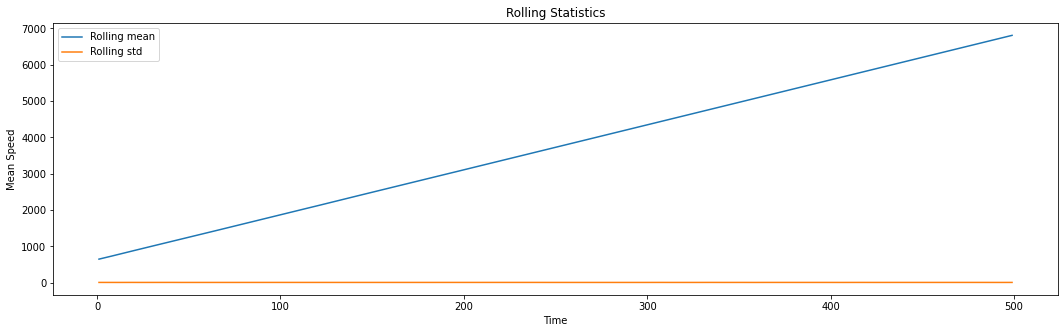

Test statistic:  1.105212668594232
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





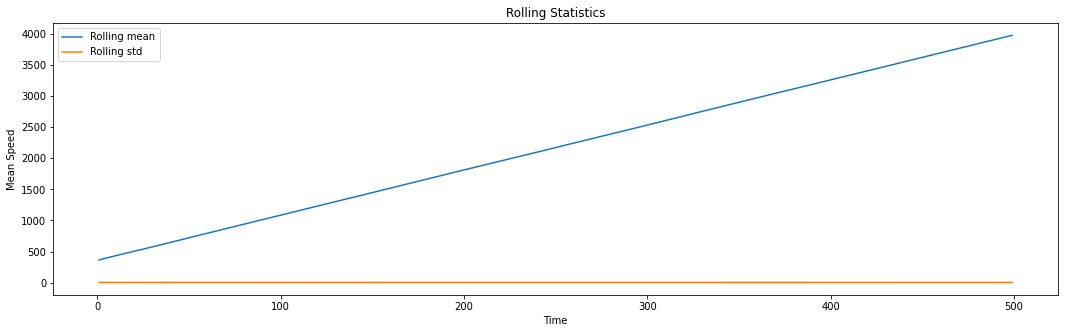

Test statistic:  0.4954367225954184
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





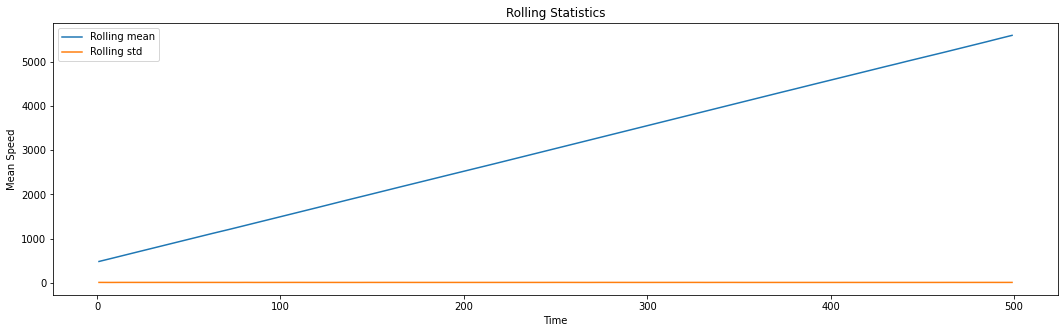

Test statistic:  0.17968156114424255
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





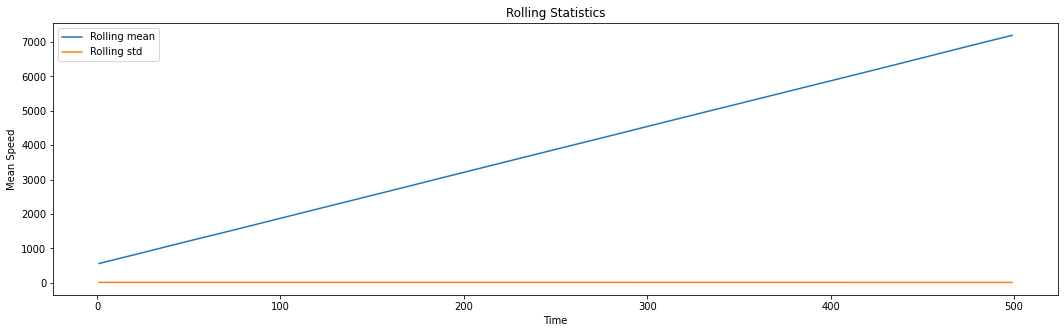

Test statistic:  -0.9638385671157662
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





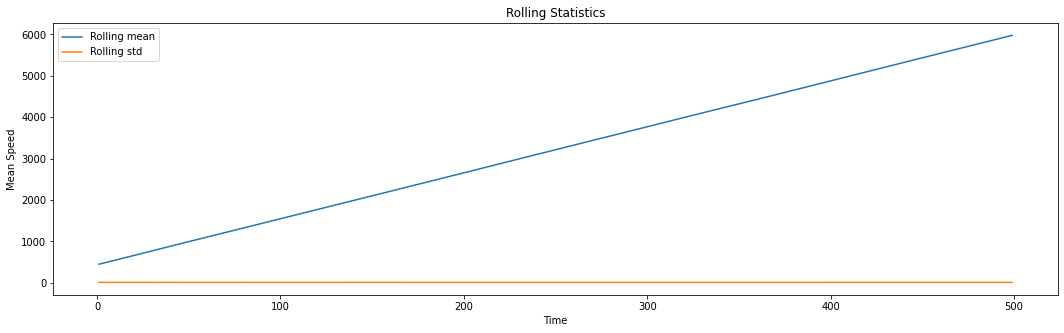

Test statistic:  0.9615807758620014
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





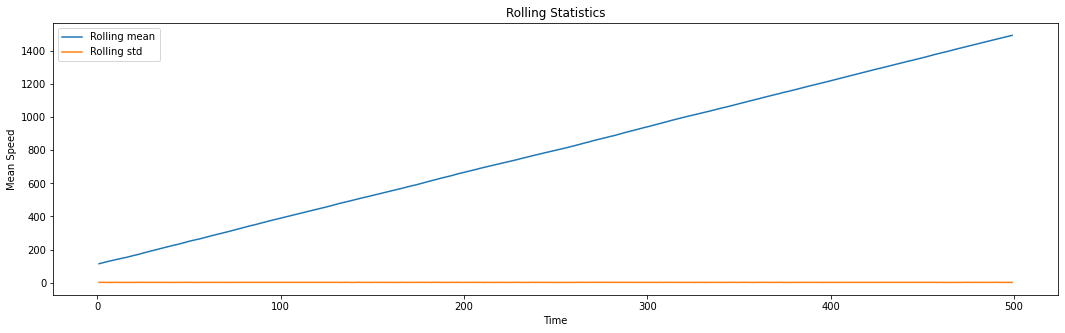

Test statistic:  -0.596693139245666
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





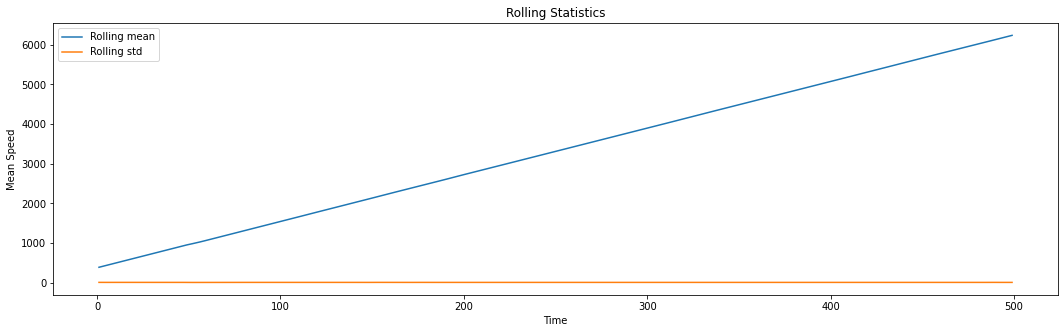

Test statistic:  1.5142060240479245
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





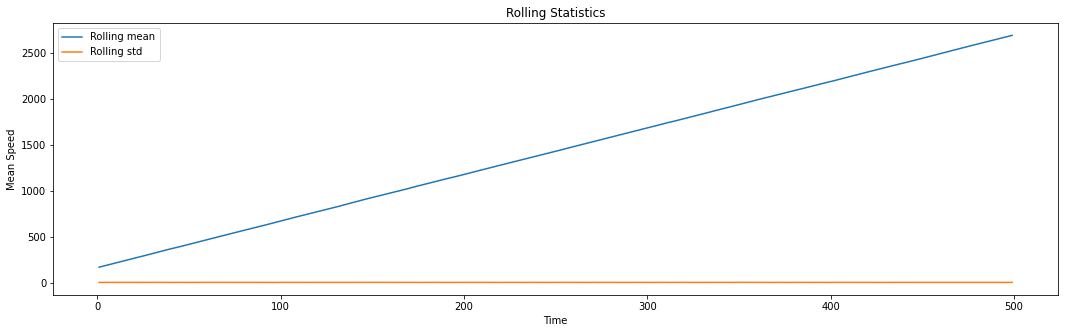

Test statistic:  -1.2143550793358548
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





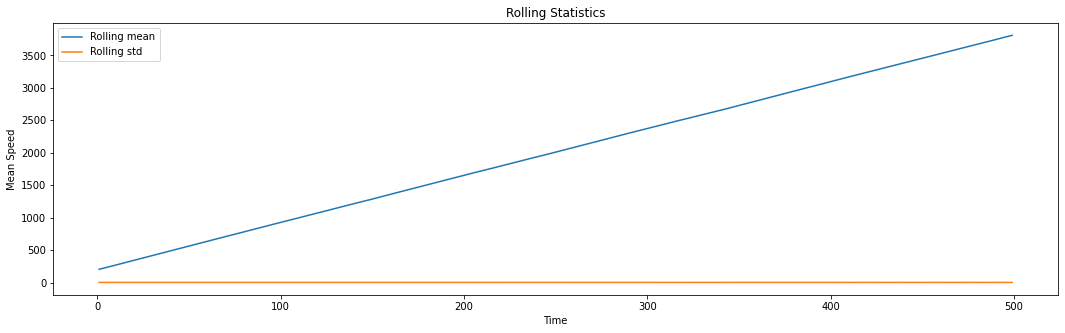

Test statistic:  1.0247744032828872
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





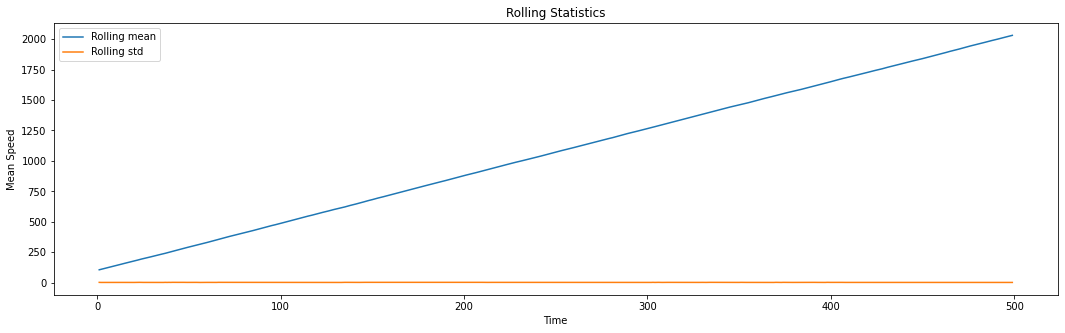

Test statistic:  -0.6547076749632394
Critical Values: {'1%': -3.434815425568625, '5%': -2.8635121913888306, '10%': -2.567819976000063}





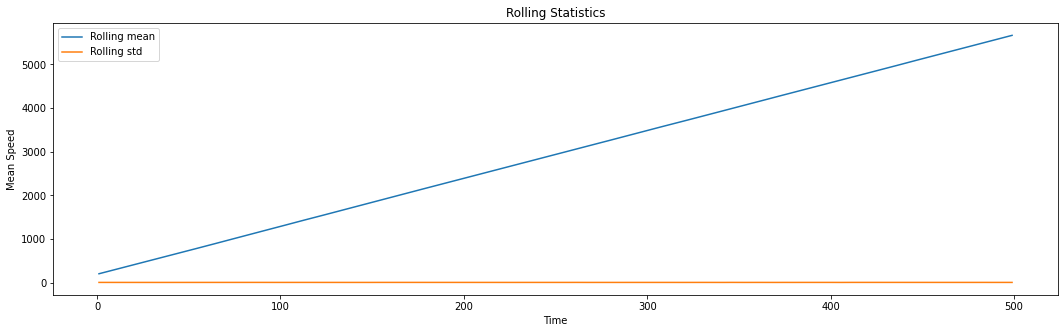

Test statistic:  0.3891976518697515
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





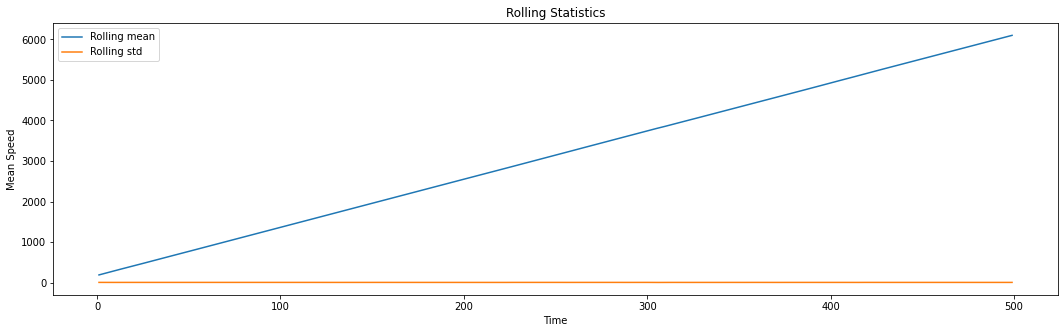

Test statistic:  -1.0485839645671824
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





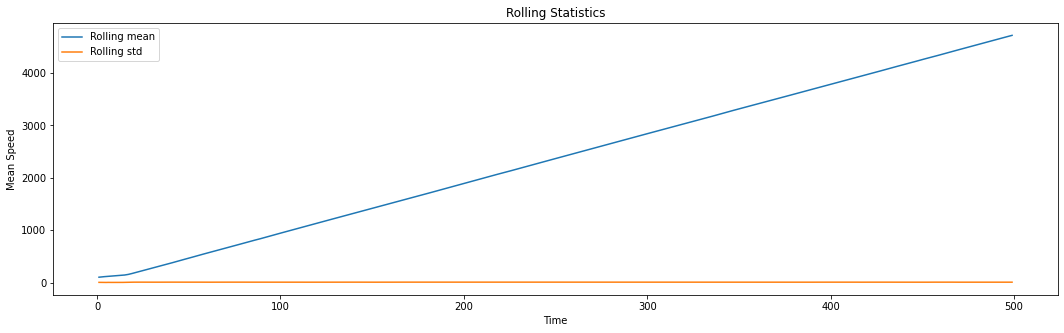

Test statistic:  6.154533846860329
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





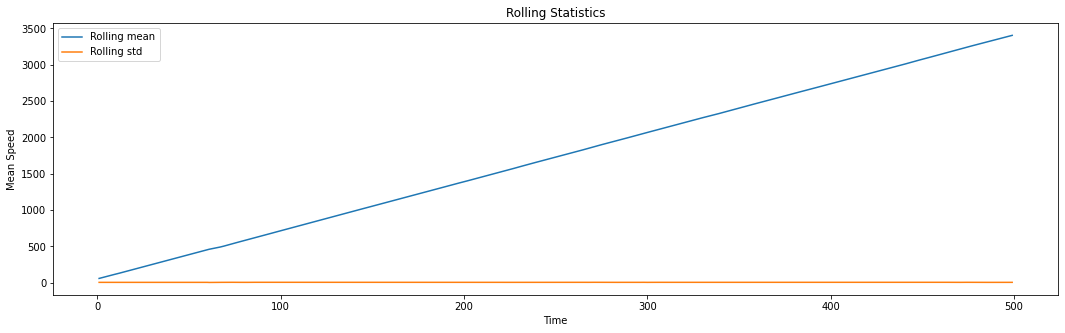

Test statistic:  1.49907329755214
Critical Values: {'1%': -3.434821532444398, '5%': -2.863514886524506, '10%': -2.5678214111987328}





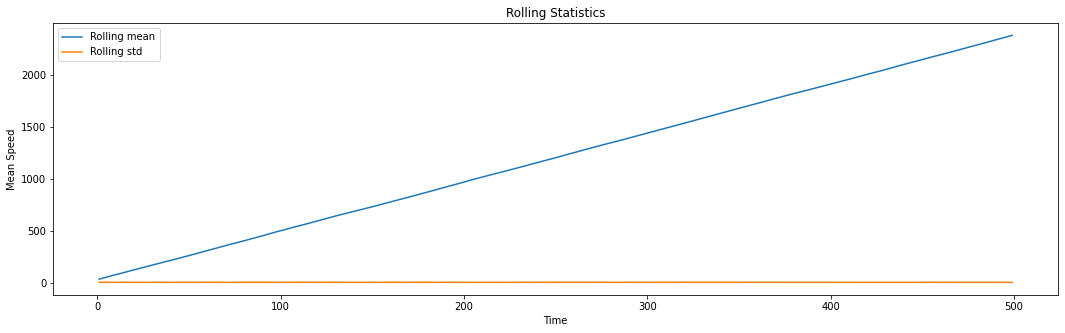

Test statistic:  1.6522456521598672
Critical Values: {'1%': -3.434812378381713, '5%': -2.863510846577674, '10%': -2.5678192598690317}





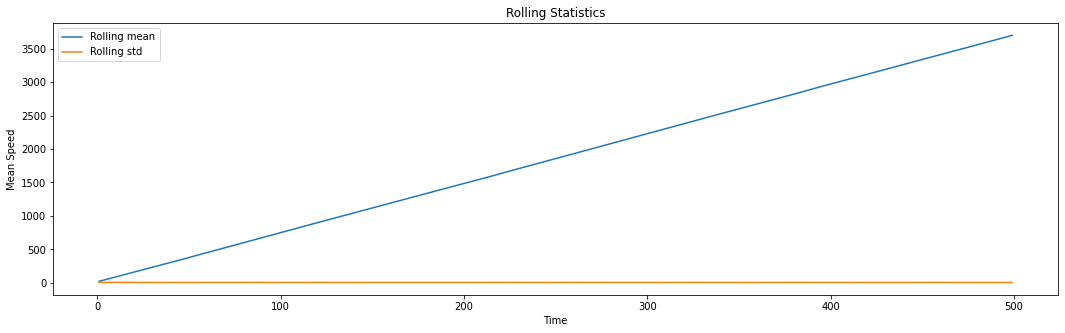

Test statistic:  1.011266872940385
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





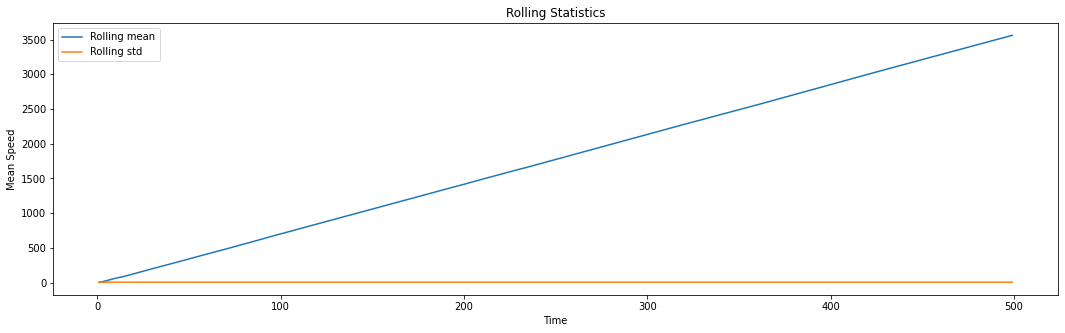

Test statistic:  1.844010420672893
Critical Values: {'1%': -3.434806296467238, '5%': -2.8635081624499494, '10%': -2.567817830533574}





In [16]:
# check stationary: mean, variance(std) and adfuller test
for feature in positions_df.columns:
    mean_std_test(positions_df.loc[:, feature], 2)
    adfuller_test(positions_df.loc[:, feature])
    print('\n\n')

## Observations
- Rolling standard deviation is constant, so constant variance
- All the vehicles **DO NOT** satisfy the condition `Test statistics < Crictical values`

>The data is NOT stationary, stationarity tests failed ❌


## lag 1 Differencing

In [17]:
# example of a difference transform

# difference dataset
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

# # invert difference
# inverted = invert_difference(data, transformed, 1)
# print(inverted)

In [18]:
pos_diff = pd.DataFrame()

for series in positions_df:
    pos_diff[series] = difference(positions_df.loc[:, series], 1)

In [19]:
pos_diff

veh_1_pos  veh_2_pos  veh_3_pos  veh_4_pos  veh_5_pos  veh_6_pos  \
0         12.67       7.80      10.79      13.31      11.17       2.85   
1         12.33       7.56      10.26      13.81      11.31       3.11   
2         11.73       7.21      10.26      13.15      10.97       2.97   
3         12.86       7.84       9.89      12.98      11.72       2.57   
4         11.96       7.20      10.38      13.42      11.10       2.68   
...         ...        ...        ...        ...        ...        ...   
1465      12.83       7.22      10.45      12.75      11.48       3.37   
1466      12.27       6.76       9.88      13.66      11.70       2.75   
1467      12.91       7.17      10.79      13.55      11.61       2.61   
1468      12.53       7.03      10.21      13.84      10.98       2.36   
1469      11.81       7.24       9.67      13.02      11.38       2.11   

      veh_7_pos  veh_8_pos  veh_9_pos  veh_10_pos  veh_11_pos  veh_12_pos  \
0         12.32       4.63       7.63        4.21       10.89       12.47   
1         11.31       5.40       7.33        3.25       10.77       11.91   
2         12.42       4.76       6.76        3.82       10.74       12.42   
3         12.24       4.48       6.63        3.34       10.86       12.07   
4         11.75       5.16       7.69        3.46       11.08       11.47   
...         ...        ...        ...         ...         ...         ...   
1465      11.54       4.88       7.22        3.52       10.43       12.17   
1466      11.91       4.57       6.96        3.99       10.98       11.77   
1467      12.27       4.70       6.60        4.18       11.26       11.53   
1468      12.42       4.70       7.46        4.11       11.59       11.31   
1469      12.29       4.84       6.68        4.49       10.31       12.39   

      veh_13_pos  veh_14_pos  veh_15_pos  veh_16_pos  veh_17_pos  
0           4.32        6.16        5.31        6.78        1.45  
1           3.54        6.17        4.61        7.65        2.95  
2           3.45        7.23        4.66        6.92        5.52  
3           3.24        6.45        4.70        7.51        7.55  
4           2.15        7.32        5.06        7.04        7.66  
...          ...         ...         ...         ...         ...  
1465        9.66        6.62        5.31        7.81        7.15  
1466        9.34        7.38        5.14        7.36        7.03  
1467        9.55        6.38        5.37        7.80        7.72  
1468        8.86        6.78        4.50        7.45        7.10  
1469        8.90        6.87        5.28        7.13        7.17  

[1470 rows x 17 columns]

### Stationarity tests - After Transformation

In [20]:
pos_diff.isnull().sum()

veh_1_pos     0
veh_2_pos     0
veh_3_pos     0
veh_4_pos     0
veh_5_pos     0
veh_6_pos     0
veh_7_pos     0
veh_8_pos     0
veh_9_pos     0
veh_10_pos    0
veh_11_pos    0
veh_12_pos    0
veh_13_pos    0
veh_14_pos    0
veh_15_pos    0
veh_16_pos    0
veh_17_pos    0
dtype: int64

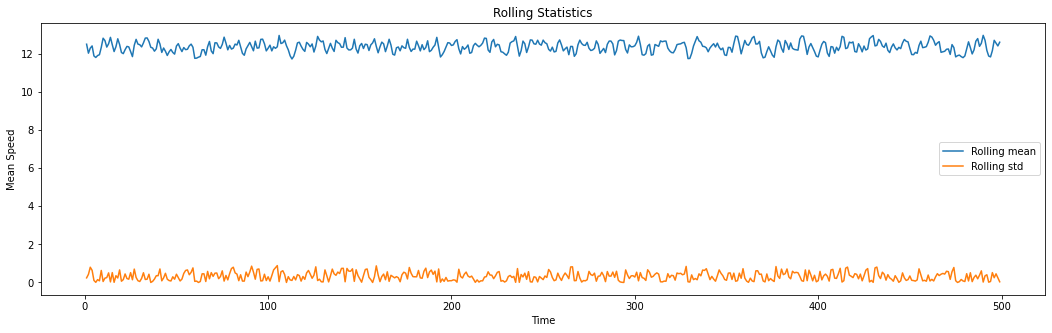

Test statistic:  -26.476021649467736
Critical Values: {'1%': -3.434812378381713, '5%': -2.863510846577674, '10%': -2.5678192598690317}





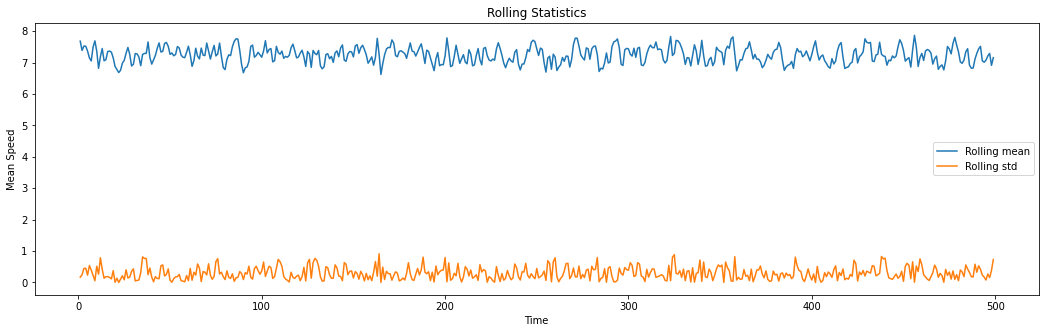

Test statistic:  -37.634350816455175
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





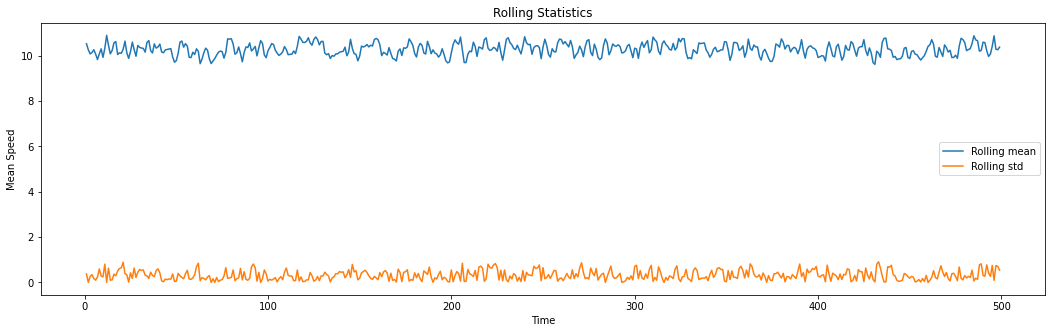

Test statistic:  -37.420386933820744
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





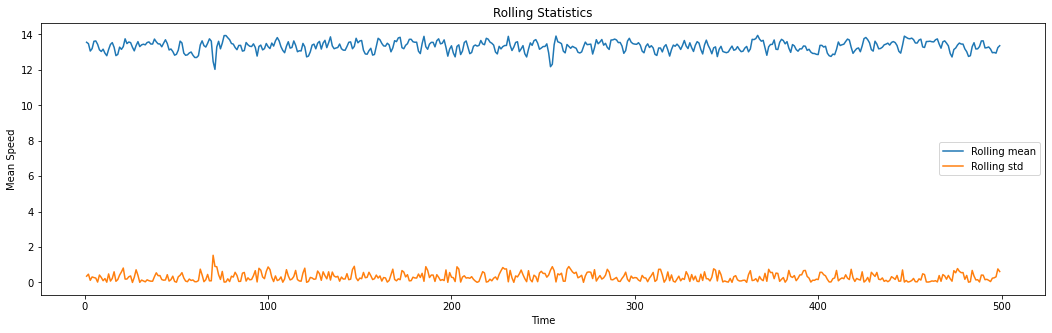

Test statistic:  -36.33028795478218
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





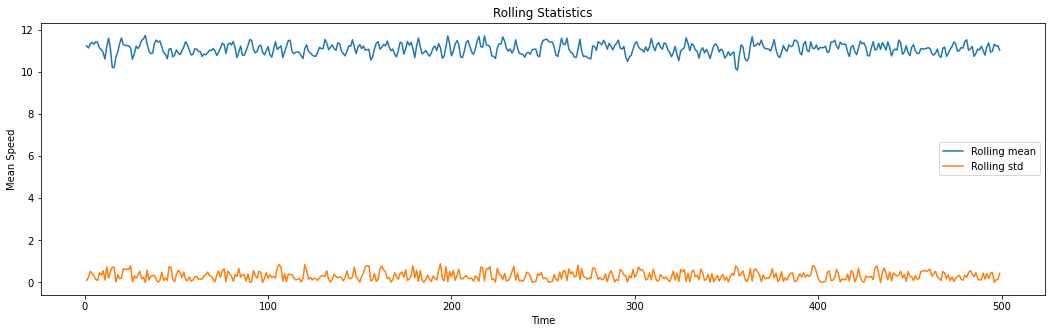

Test statistic:  -37.7684581932218
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





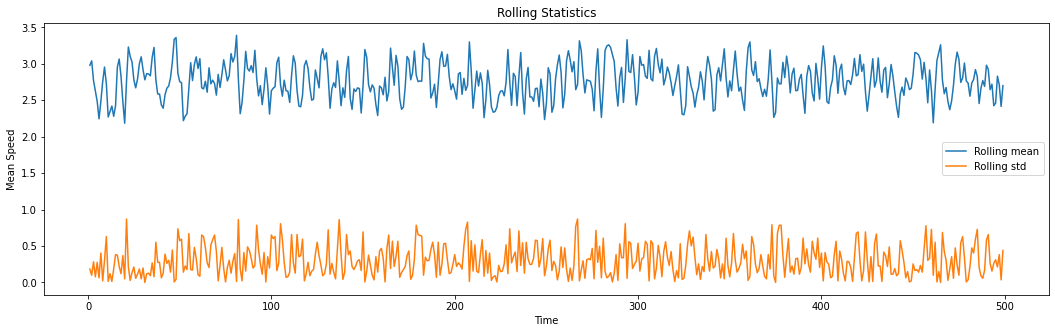

Test statistic:  -20.041445398020798
Critical Values: {'1%': -3.4348184769200056, '5%': -2.86351353803652, '10%': -2.567820693109295}





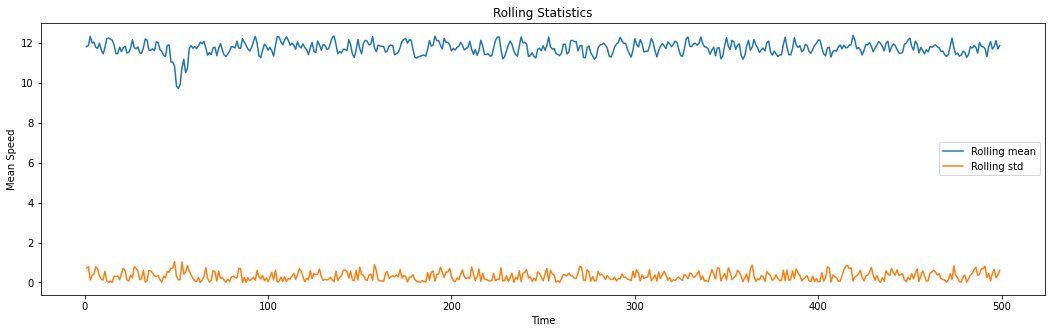

Test statistic:  -34.70595449027645
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





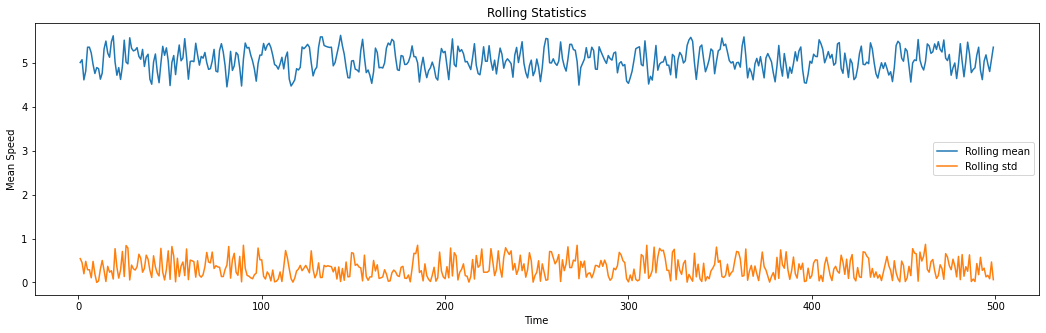

Test statistic:  -38.51323020606467
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





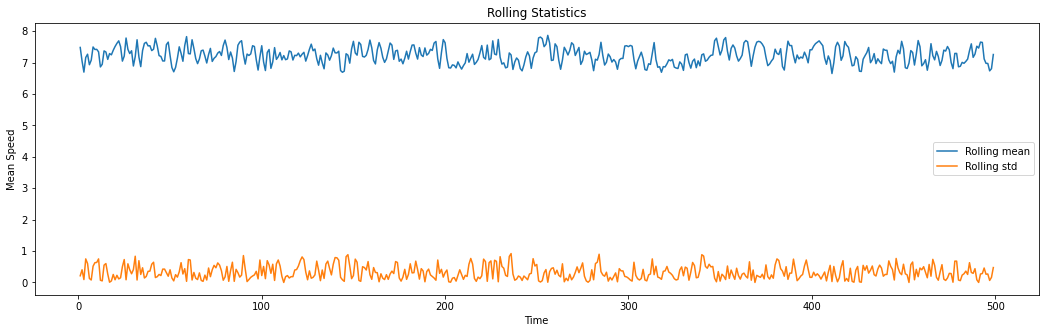

Test statistic:  -38.01004346881325
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





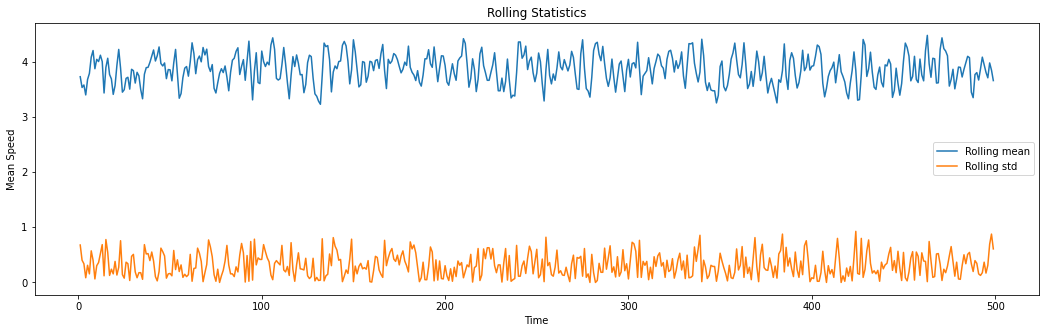

Test statistic:  -23.4864123832547
Critical Values: {'1%': -3.434815425568625, '5%': -2.8635121913888306, '10%': -2.567819976000063}





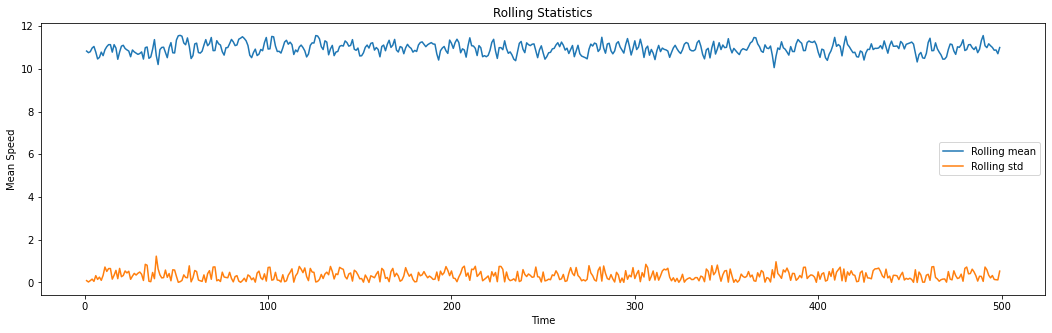

Test statistic:  -37.15400539986371
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





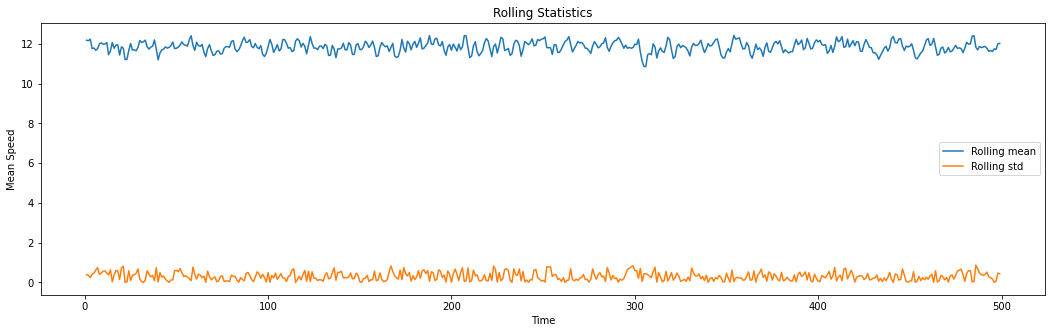

Test statistic:  -38.71335663004534
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





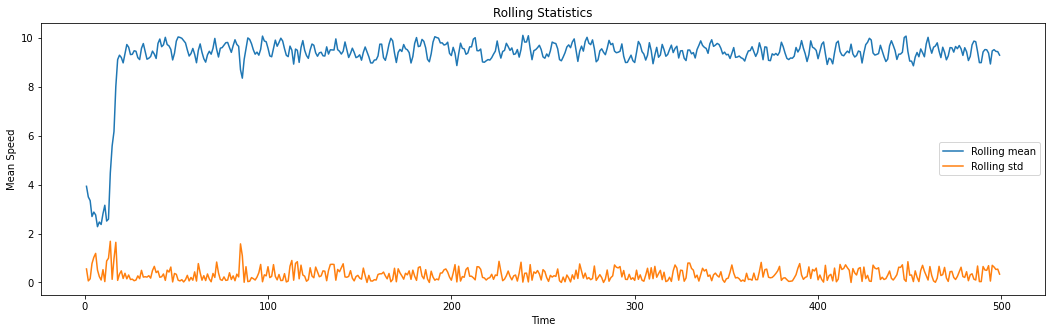

Test statistic:  -15.791474094397607
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





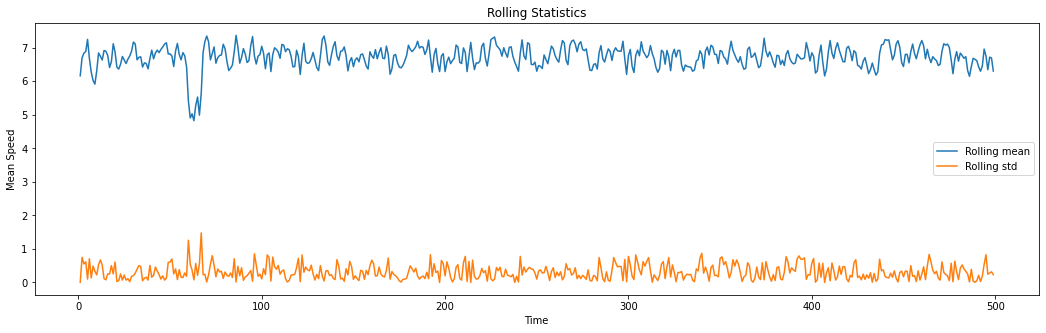

Test statistic:  -14.629720301661363
Critical Values: {'1%': -3.434821532444398, '5%': -2.863514886524506, '10%': -2.5678214111987328}





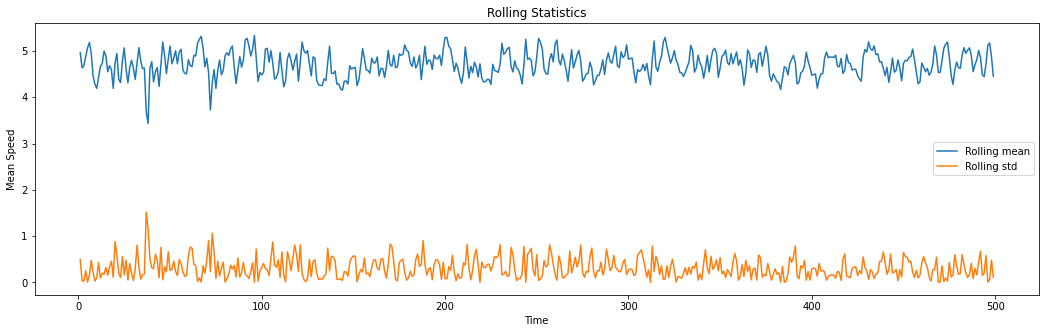

Test statistic:  -26.6169800677605
Critical Values: {'1%': -3.434812378381713, '5%': -2.863510846577674, '10%': -2.5678192598690317}





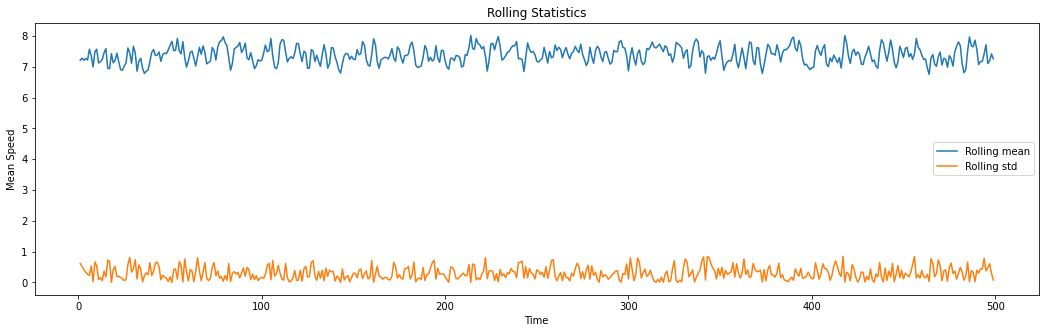

Test statistic:  -38.3360372817237
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





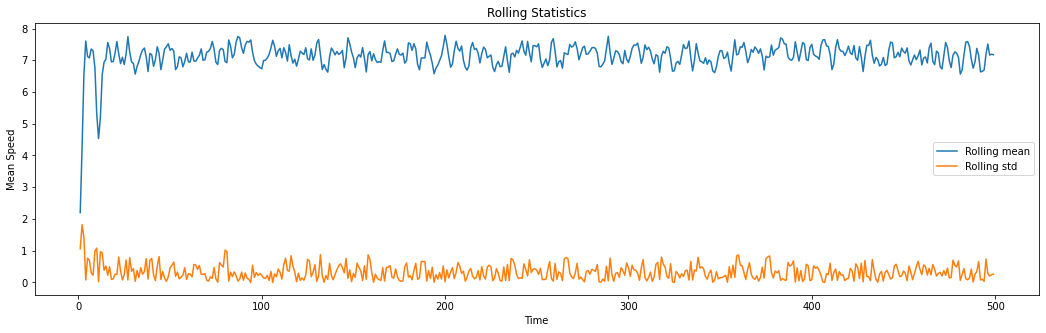

Test statistic:  -34.782025879679914
Critical Values: {'1%': -3.4348093353507494, '5%': -2.863509503599295, '10%': -2.5678185447142}





In [21]:
# stationarity test: mean, variance(std) and adfuller test
for feature in pos_diff.columns:
    mean_std_test(pos_diff.loc[:, feature], 2)
    adfuller_test(pos_diff.loc[:, feature])
    print('\n\n')

## Observations
- Rolling mean is constant
- Rolling standard deviation is constant, so constant variance condition is satisfied
- All the vehicles satisfy the condition `Test statistics < Crictical values`, so seasonality/ trends are succefully avoided

>The data is now stationary, all stationarity tests are passed ✅


## Train - Test split

In [22]:
positions_df_train = pos_diff.iloc[:1250, :]
positions_df_test = pos_diff.iloc[1250:, :]

In [23]:
assert positions_df_train.shape == (1250, 17)

In [24]:
positions_df_train.head()

veh_1_pos  veh_2_pos  veh_3_pos  veh_4_pos  veh_5_pos  veh_6_pos  \
0      12.67       7.80      10.79      13.31      11.17       2.85   
1      12.33       7.56      10.26      13.81      11.31       3.11   
2      11.73       7.21      10.26      13.15      10.97       2.97   
3      12.86       7.84       9.89      12.98      11.72       2.57   
4      11.96       7.20      10.38      13.42      11.10       2.68   

   veh_7_pos  veh_8_pos  veh_9_pos  veh_10_pos  veh_11_pos  veh_12_pos  \
0      12.32       4.63       7.63        4.21       10.89       12.47   
1      11.31       5.40       7.33        3.25       10.77       11.91   
2      12.42       4.76       6.76        3.82       10.74       12.42   
3      12.24       4.48       6.63        3.34       10.86       12.07   
4      11.75       5.16       7.69        3.46       11.08       11.47   

   veh_13_pos  veh_14_pos  veh_15_pos  veh_16_pos  veh_17_pos  
0        4.32        6.16        5.31        6.78        1.45  
1        3.54        6.17        4.61        7.65        2.95  
2        3.45        7.23        4.66        6.92        5.52  
3        3.24        6.45        4.70        7.51        7.55  
4        2.15        7.32        5.06        7.04        7.66

### Standardization

In [25]:
mean = positions_df_train.mean()
std = positions_df_train.std()

positions_df_train -= mean
positions_df_train /= std

positions_df_test -= mean
positions_df_test /= std

In [26]:
transformations = {'position_mean': mean, 'position_std': std}

In [27]:
mean

veh_1_pos     12.372568
veh_2_pos      7.246528
veh_3_pos     10.288456
veh_4_pos     13.325584
veh_5_pos     11.118480
veh_6_pos      2.762984
veh_7_pos     11.766160
veh_8_pos      5.059504
veh_9_pos      7.239512
veh_10_pos     3.859392
veh_11_pos    10.954648
veh_12_pos    11.827944
veh_13_pos     9.389896
veh_14_pos     6.754048
veh_15_pos     4.735624
veh_16_pos     7.383584
veh_17_pos     7.154192
dtype: float64

In [28]:
std

veh_1_pos     0.382052
veh_2_pos     0.369038
veh_3_pos     0.374255
veh_4_pos     0.381597
veh_5_pos     0.377265
veh_6_pos     0.370432
veh_7_pos     0.396824
veh_8_pos     0.375680
veh_9_pos     0.380575
veh_10_pos    0.376897
veh_11_pos    0.378191
veh_12_pos    0.369715
veh_13_pos    0.805262
veh_14_pos    0.399853
veh_15_pos    0.376869
veh_16_pos    0.383829
veh_17_pos    0.439913
dtype: float64

In [29]:
positions_df_train.head(n=2)

veh_1_pos  veh_2_pos  veh_3_pos  veh_4_pos  veh_5_pos  veh_6_pos  \
0   0.778512    1.49977   1.340113  -0.040839   0.136562   0.234904   
1  -0.111419    0.84943  -0.076034   1.269443   0.507654   0.936787   

   veh_7_pos  veh_8_pos  veh_9_pos  veh_10_pos  veh_11_pos  veh_12_pos  \
0   1.395683  -1.143272   1.026049    0.930249    -0.17094    1.736622   
1  -1.149528   0.906347   0.237767   -1.616866    -0.48824    0.221944   

   veh_13_pos  veh_14_pos  veh_15_pos  veh_16_pos  veh_17_pos  
0   -6.295961   -1.485665    1.524073   -1.572532  -12.966630  
1   -7.264590   -1.460656   -0.333336    0.694100   -9.556867

## Transformations for speed data

## lag 1 Differencing

In [30]:
speed_diff = pd.DataFrame()

for series in speeds_df:
    speed_diff[series] = difference(speeds_df.loc[:, series], 1)

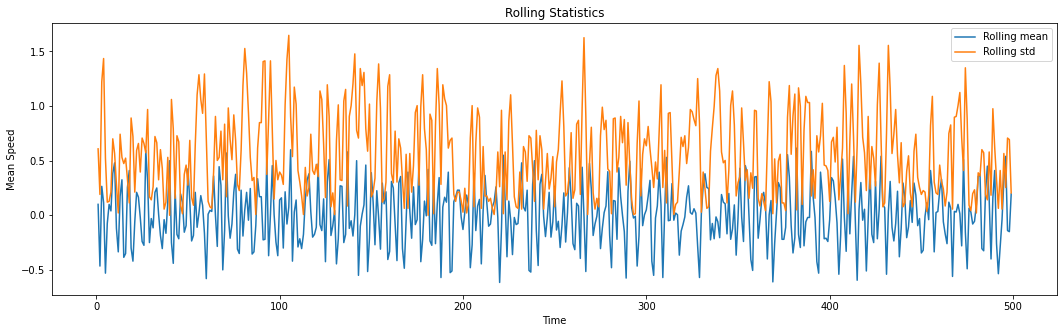

Test statistic:  -13.10079986404571
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





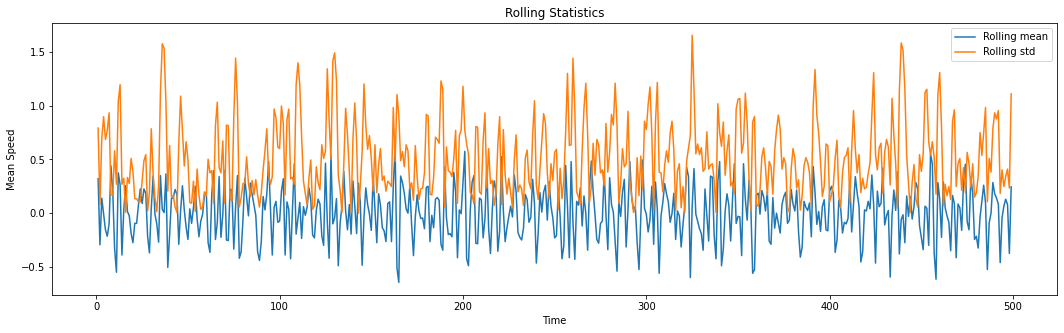

Test statistic:  -14.264945395418787
Critical Values: {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}





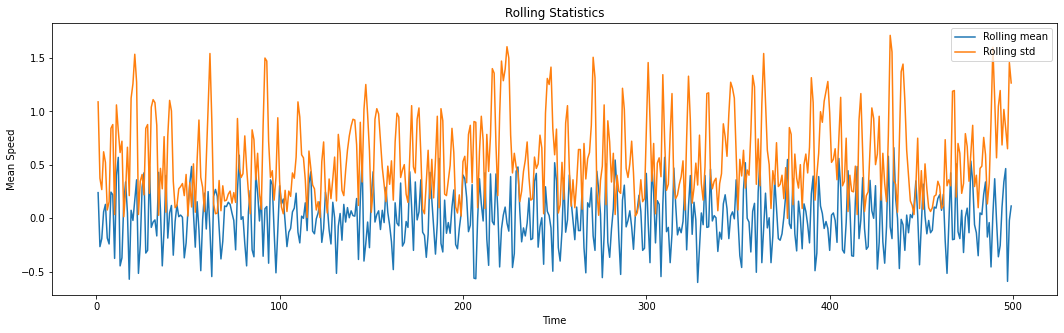

Test statistic:  -12.881374083005527
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





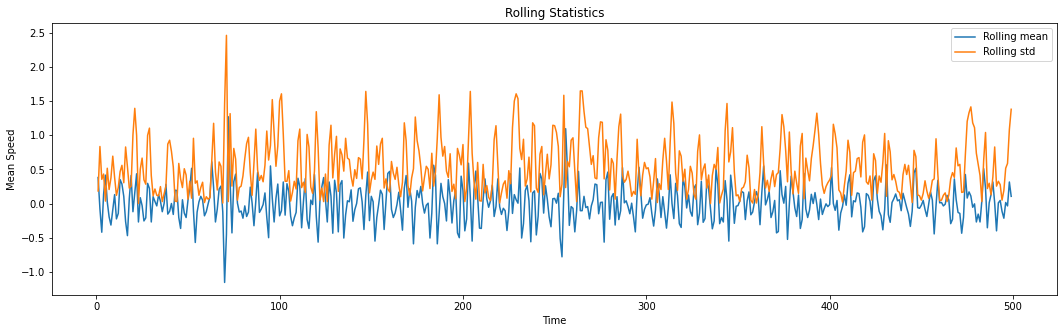

Test statistic:  -13.597509421267015
Critical Values: {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}





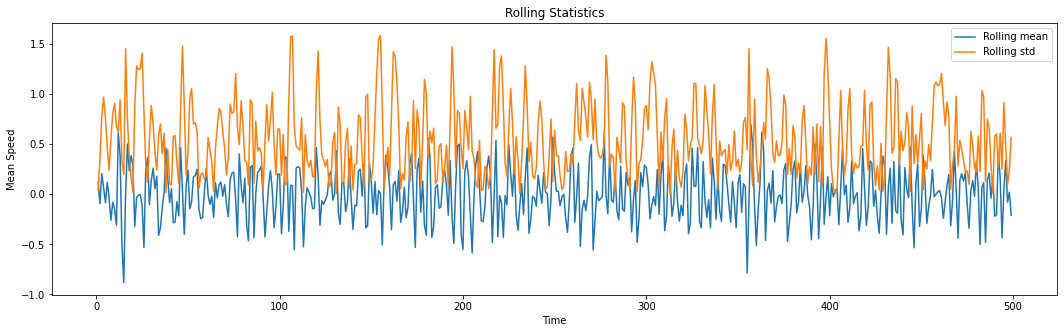

Test statistic:  -14.465708169255112
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





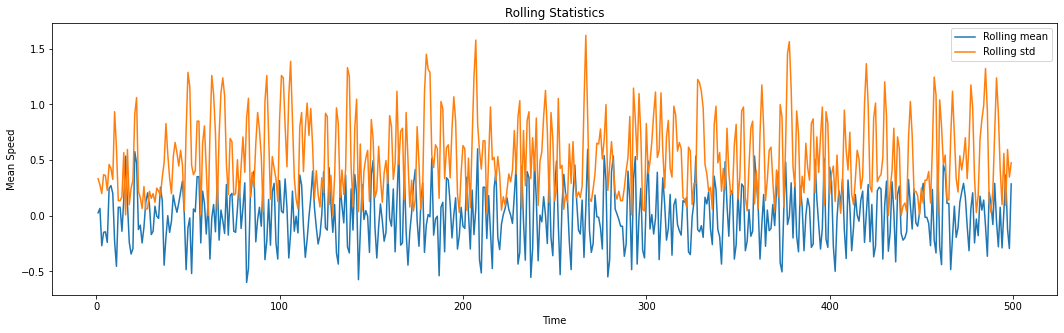

Test statistic:  -13.922661075139782
Critical Values: {'1%': -3.434880391815318, '5%': -2.8635408625359315, '10%': -2.5678352438452814}





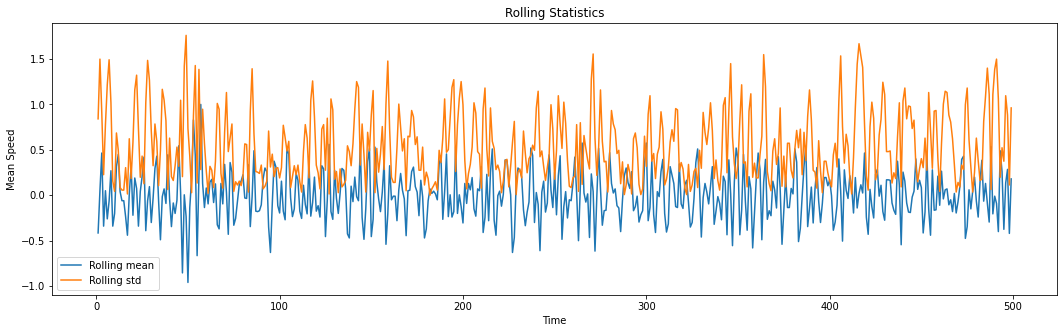

Test statistic:  -12.969351915181967
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





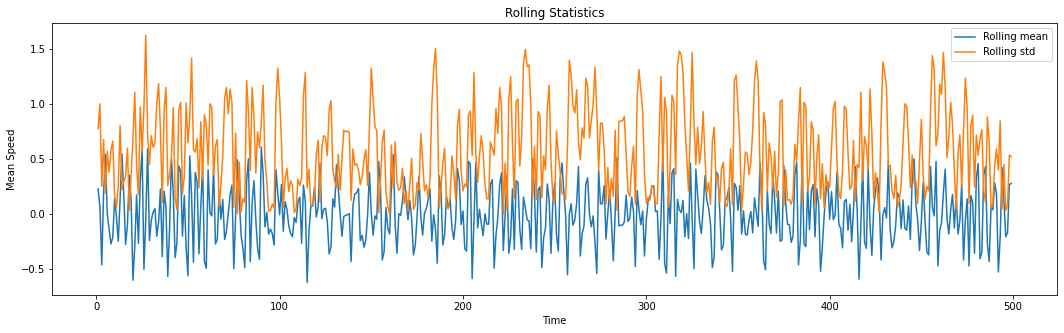

Test statistic:  -14.135258254741185
Critical Values: {'1%': -3.4348772553489617, '5%': -2.8635394783531085, '10%': -2.5678345067434516}





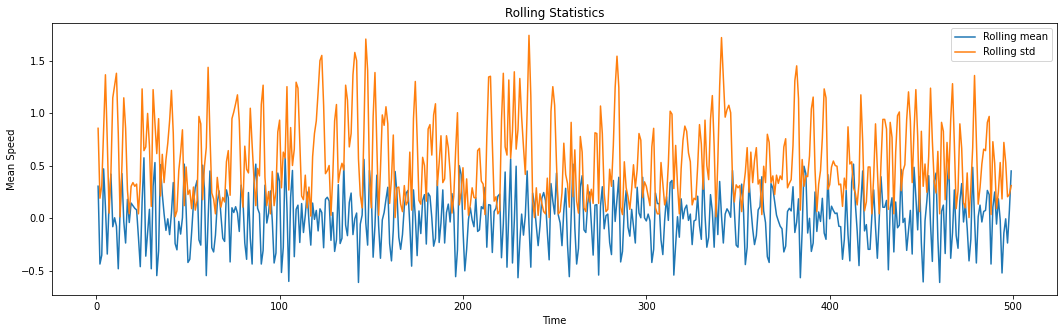

Test statistic:  -14.435771205202473
Critical Values: {'1%': -3.4348678719530934, '5%': -2.863535337271721, '10%': -2.5678323015457787}





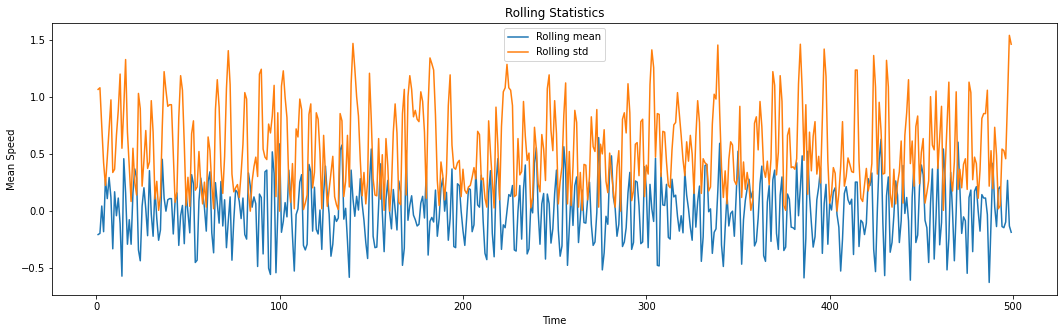

Test statistic:  -13.95091702968763
Critical Values: {'1%': -3.4348772553489617, '5%': -2.8635394783531085, '10%': -2.5678345067434516}





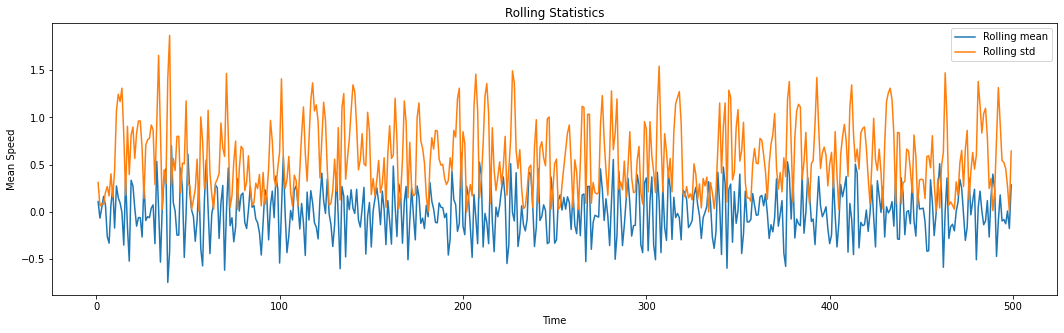

Test statistic:  -16.32911277910252
Critical Values: {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}





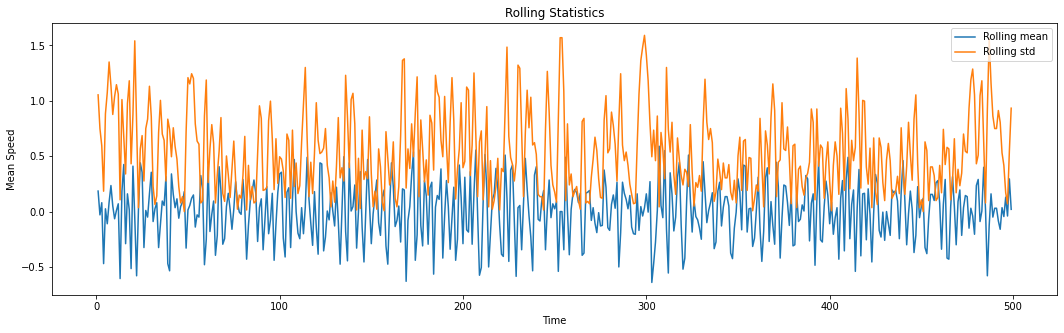

Test statistic:  -13.761484724769305
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





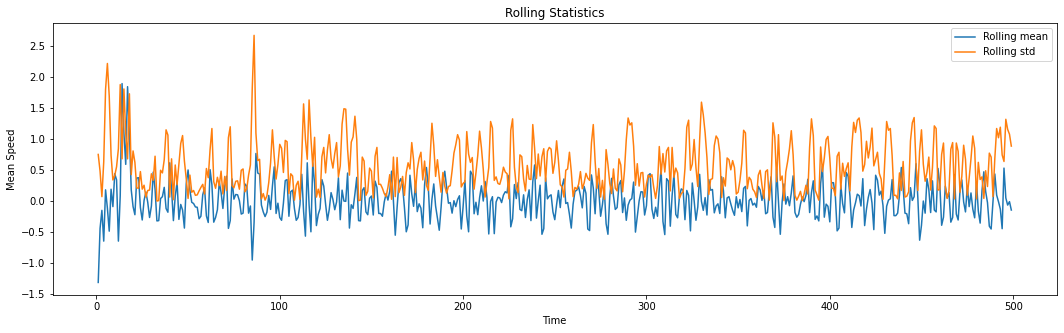

Test statistic:  -13.123408308341189
Critical Values: {'1%': -3.4348399537053482, '5%': -2.8635230163107837, '10%': -2.5678257404326903}





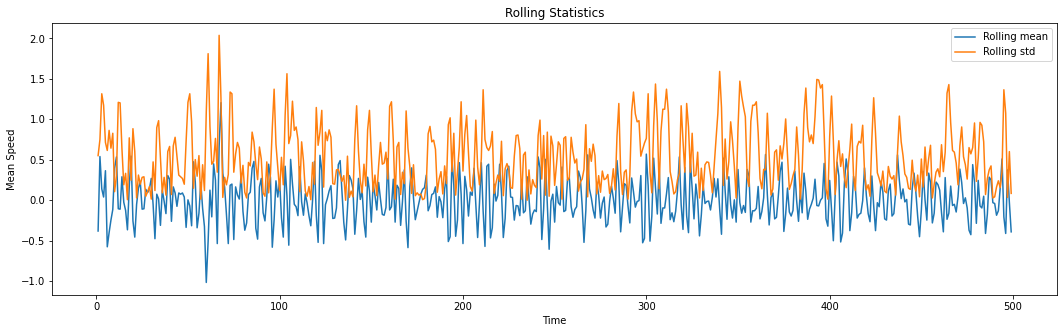

Test statistic:  -13.192758442121521
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





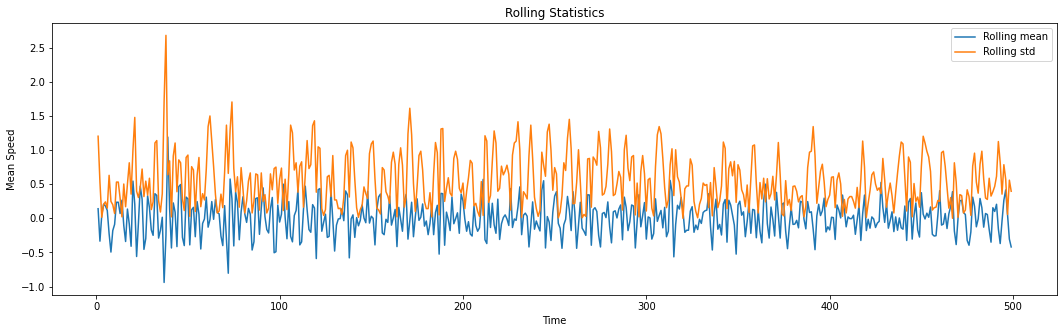

Test statistic:  -12.97167760143552
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





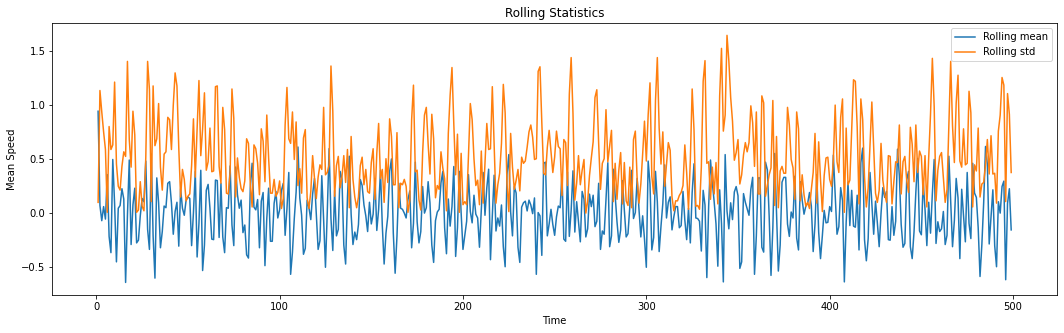

Test statistic:  -13.73827865908377
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





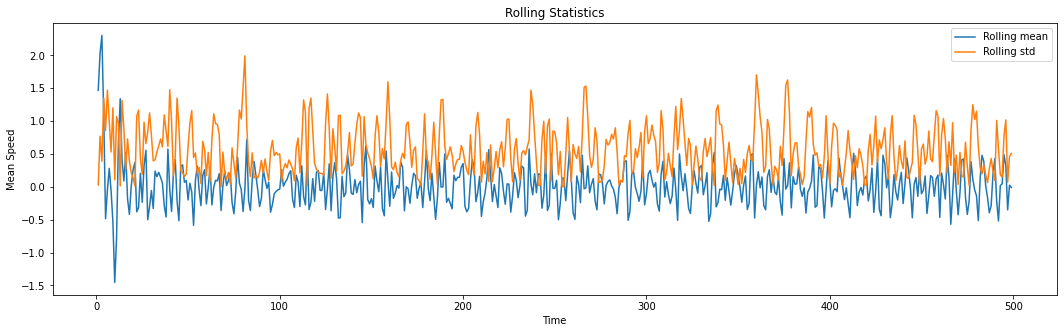

Test statistic:  -16.204806913399587
Critical Values: {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}





In [31]:
speed_diff.dropna(inplace=True)

# check stationary: mean, variance(std) and adfuller test
for feature in speed_diff.columns:
    mean_std_test(speed_diff.loc[:, feature], 2)
    adfuller_test(speed_diff.loc[:, feature])
    print('\n\n')

## Observations
- Rolling mean is constant by speculation
- Rolling standard deviation is constant, so constant variance condition is also satisfied
- All the vehicles satisfy the condition `Test statistics < Crictical values`, so seasonality/ trends are succefully avoided

>The data is now stationary, all stationarity tests are passed ✅


## Train - Test split

In [32]:
speeds_df_train = speed_diff.iloc[:1250, :]
speeds_df_test = speed_diff.iloc[1250:, :]

In [33]:
assert speeds_df_train.shape == (1250, 17)

In [34]:
mean = speeds_df_train.mean(axis=0)
std = speeds_df_train.std(axis=0)

speeds_df_train = speeds_df_train - mean
speeds_df_train = speeds_df_train / std

speeds_df_test = speeds_df_test - mean
speeds_df_test = speeds_df_test / std

In [35]:
transformations['speed_mean'] = mean
transformations['speed_std'] = std

In [36]:
with open('inverse_transformations.pkl', 'wb') as outfile:
    pickle.dump(transformations, outfile)

In [37]:
speeds_df_train.head(n=3)

veh_1_speed  veh_2_speed  veh_3_speed  veh_4_speed  veh_5_speed  \
0     0.966139     1.694634     1.932977     0.471874     0.169464   
1    -0.602055    -0.463703    -1.014942     0.962639     0.283065   
2    -1.094395    -0.675683    -0.000398    -1.264678    -0.644682   

   veh_6_speed  veh_7_speed  veh_8_speed  veh_9_speed  veh_10_speed  \
0    -0.405360     0.338901    -0.598787     1.687808      1.028775   
1     0.503467    -1.899122     1.456101    -0.558494     -1.796666   
2    -0.250666     2.087944    -1.196572    -1.059735      1.066198   

   veh_11_speed  veh_12_speed  veh_13_speed  veh_14_speed  veh_15_speed  \
0      0.630598      1.769638     -3.341727     -1.417971      1.802373   
1     -0.211608     -1.066394     -1.419368      0.018430     -1.292561   
2     -0.039339      0.951186     -0.186157      1.970462      0.072851   

   veh_16_speed  veh_17_speed  
0      1.855779      2.667100  
1      1.598124      2.740968  
2     -1.346505      4.753865

- most vehicles are now almost constant around the mean by speculation

In [38]:
assert positions_df_train.shape == (1250, 17), "dimensions mismatch for postions in train dataset"
assert positions_df_test.shape == (1470 - 1250, 17), "dimensions mismatch for postions in test dataset" 

assert speeds_df_test.shape == (1470 - 1250, 17), "dimensions mismatch for speed in test dataset"
assert speeds_df_train.shape == (1250, 17), "dimensions mismatch for speed in train dataset"

# Export

In [39]:
positions_train_dataset = os.path.join(CACHE, 'positions_train_out.csv')
positions_test_dataset = os.path.join(CACHE, 'positions_test_out.csv')
speeds_train_dataset = os.path.join(CACHE, 'speeds_train_out.csv')
speeds_test_dataset = os.path.join(CACHE, 'speeds_test_out.csv')

In [40]:
positions_df_train.to_csv(positions_train_dataset, index=False)
positions_df_test.to_csv(positions_test_dataset, index=False)

speeds_df_train.to_csv(speeds_train_dataset, index=False)
speeds_df_test.to_csv(speeds_test_dataset, index=False)